<a href="https://colab.research.google.com/github/NP-15/Machine-learning/blob/main/Sessions/Ensemble-Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive

drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


### Random Forest Classifier

In [15]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Reading the dataset
df = pd.read_csv("/content/drive/MyDrive/Machine-learning-main/assets/jobs.csv")

# Dropping rows with missing values
df.dropna(inplace=True)
df = df.set_index("index")

df.head()

,Student,Consultant,Reason,Job_Opportunities,Course_Fee
index,,,,,
1,Alice,Cousin,Interest in subject,High,$10
2,Bob,Teacher,Career growth,Medium,$8
3,Charlie,Parent,Fulfill family expectations,Low,$5
4,David,Degree student,Good faculty,High,$9
5,Eve,Working professional,High demand in industry,High,$12


In [16]:
# Handle missing values
df['Course_Fee'] = df['Course_Fee'].fillna('Unknown')

# Encode categorical variables
le = LabelEncoder()
df['Consultant'] = le.fit_transform(df['Consultant'])
df['Course_Fee'] = le.fit_transform(df['Course_Fee'])
df['Job_Opportunities'] = le.fit_transform(df['Job_Opportunities'])

# Split the data into features and target
X = df[['Consultant', 'Job_Opportunities', 'Course_Fee']]
y = df['Course_Fee']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


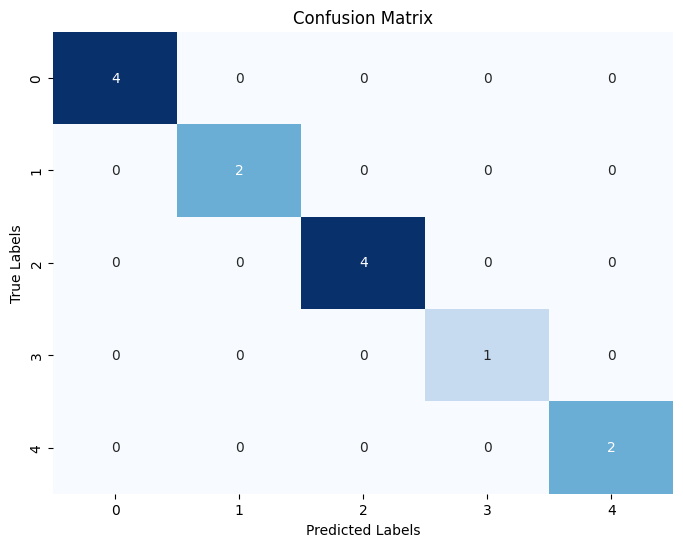

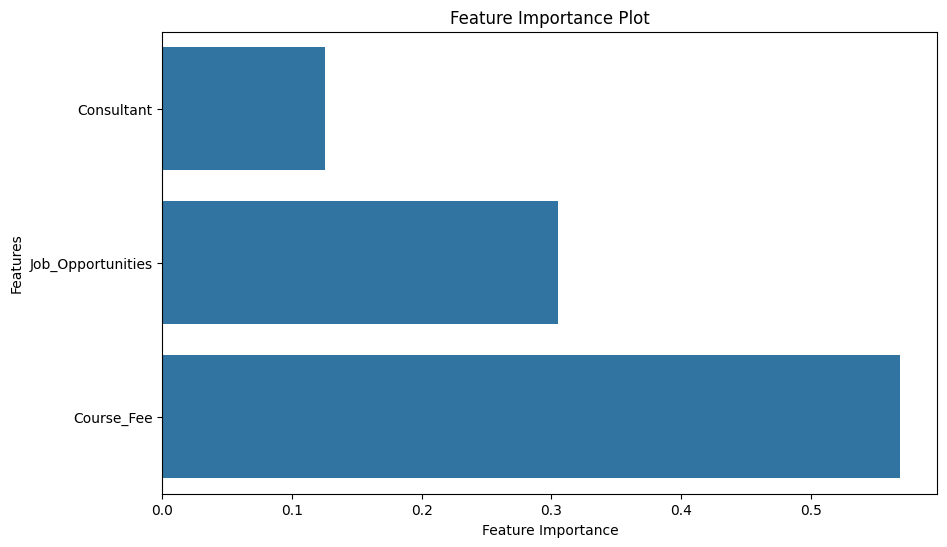

In [23]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

'''# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.show()'''

# Feature Importance
feature_importance = rf.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()


## AdaBoost

In [19]:
from sklearn.ensemble import AdaBoostClassifier

# Train the AdaBoost Classifier
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)

# Evaluate the model
y_pred_adaboost = adaboost.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("Adaboost Classifier Accuracy:", accuracy_adaboost)

Adaboost Classifier Accuracy: 0.5384615384615384


## xGBoost

In [20]:
from xgboost import XGBClassifier

# Train the XGBoost Classifier
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# Evaluate the model
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Classifier Accuracy:", accuracy_xgb)

XGBoost Classifier Accuracy: 1.0
